In [626]:
#Importing libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score , KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score , r2_score , confusion_matrix , recall_score , precision_score , accuracy_score , classification_report , f1_score , roc_curve
from sklearn.decomposition import PCA , IncrementalPCA
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.under_sampling import RandomUnderSampler , TomekLinks
from imblearn.over_sampling import RandomOverSampler , SMOTE , ADASYN 

import warnings
warnings.filterwarnings('ignore')

In [519]:
#Read Data
pd.set_option('display.max_columns' , None)
telecom = pd.read_csv("telecom_churn_data.csv")
print(telecom.shape)
telecom.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [520]:
#Checking all columns
pd.set_option('display.max_columns' , None)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### Lets Check datasets has any duplicate values

In [521]:
telecom.drop_duplicates()
telecom.shape

(99999, 226)

#### No duplicates. Now lets see data types.

In [522]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [523]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Handling Missing Values

In [524]:
#Checking missing values
pd.set_option("display.max_rows" , None)
telecom.isnull().mean().sort_values(ascending=False)*100

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

#### Deleting rows that have missing value over 50%.Since we won't get any insights through those columns.


In [525]:
to_be_deleted = telecom.isnull().mean()*100
to_be_deleted = to_be_deleted[to_be_deleted > 50 ].index
telecom.drop(columns=to_be_deleted , axis=1 , inplace=True )

In [526]:
#Checking missing values again
pd.set_option("display.max_rows" , None)
telecom.isnull().mean().sort_values(ascending=False)*100

loc_og_t2m_mou_9        7.745077
loc_ic_t2m_mou_9        7.745077
offnet_mou_9            7.745077
std_ic_t2f_mou_9        7.745077
roam_ic_mou_9           7.745077
std_og_t2t_mou_9        7.745077
roam_og_mou_9           7.745077
std_ic_t2m_mou_9        7.745077
loc_og_t2t_mou_9        7.745077
std_ic_t2o_mou_9        7.745077
loc_og_mou_9            7.745077
std_ic_t2t_mou_9        7.745077
isd_og_mou_9            7.745077
loc_ic_t2f_mou_9        7.745077
loc_og_t2c_mou_9        7.745077
loc_og_t2f_mou_9        7.745077
loc_ic_t2t_mou_9        7.745077
std_og_t2m_mou_9        7.745077
spl_ic_mou_9            7.745077
std_ic_mou_9            7.745077
ic_others_9             7.745077
std_og_mou_9            7.745077
isd_ic_mou_9            7.745077
spl_og_mou_9            7.745077
onnet_mou_9             7.745077
std_og_t2c_mou_9        7.745077
loc_ic_mou_9            7.745077
og_others_9             7.745077
std_og_t2f_mou_9        7.745077
std_og_t2t_mou_8        5.378054
std_og_t2c

#### Deleting remaining date columns as of the date columns won't required for analysis.

In [527]:
# Listing of all date columns 
date_cols = [k for k in telecom.columns.to_list() if 'date' in k]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [528]:
# Droping all data columns
telecom.drop(date_cols , axis=1 , inplace=True)

In [529]:
telecom['circle_id'].unique()

array([109], dtype=int64)

#### Deleting 'circle_id' as of there is one unique value

In [530]:
# Deleting 'circle_id'
telecom.drop('circle_id' , inplace=True , axis=1)

In [531]:
#Checking missing values again
pd.set_option("display.max_rows" , None)
telecom.isnull().mean().sort_values(ascending=False)*100

std_og_t2t_mou_9      7.745077
loc_og_t2m_mou_9      7.745077
roam_og_mou_9         7.745077
isd_og_mou_9          7.745077
std_ic_t2f_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_og_mou_9          7.745077
std_og_t2c_mou_9      7.745077
std_ic_mou_9          7.745077
roam_ic_mou_9         7.745077
std_og_t2f_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
std_og_t2m_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
loc_ic_mou_9          7.745077
spl_og_mou_9          7.745077
loc_og_mou_9          7.745077
std_ic_t2t_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
og_others_9           7.745077
ic_others_9           7.745077
loc_ic_t2f_mou_9      7.745077
offnet_mou_9          7.745077
std_ic_t2m_mou_9      7.745077
onnet_mou_9           7.745077
loc_ic_t2t_mou_9      7.745077
spl_ic_mou_9          7.745077
isd_ic_mou_9          7.745077
std_og_t2m_mou_8      5.378054
loc_ic_t2f_mou_8      5.378054
std_ic_t2t_mou_8      5.378054
std_ic_t

### Filter high-value customers
<li>Since we need high value customers , we are adding first two months recharge and taking more than 70 percentile of avarage recharge</li>

In [532]:
# taking average of total recharge in months 6 & 7
telecom['avg_rech_amt_6&7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_6'])/2


In [533]:
# Finding out 70 percentile of first 2 months
x = telecom['avg_rech_amt_6&7'].quantile(0.7)
x

378.0

In [534]:
# Filtering out 70 percentile
telecom = telecom[telecom['avg_rech_amt_6&7'] >= x]
telecom.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6&7
6,7001051193,0.0,0.0,0.0,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,49.24,92.08,50.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,15.23,252.23,48.71,80.63,50.33,10.38,0.00,0.00,0.00,0.11,0.0,0.00,0.0,333.64,93.74,156.78,65.56,0.00,0.00,0.51,0.00,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.53,11.96,0.00,0.0,0.00,0.00,0.0,0.11,0.53,0.00,0.0,0.0,0.0,0.0,0.35,333.76,94.81,168.74,65.91,1857.99,1427.04,1896.43,2334.88,248.64,336.96,265.28,231.41,20.24,22.69,2.51,6.19,2126.89,1786.71,2164.23,2572.49,0.00,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.39,0.76,2.60,0.00,2128.41,1788.06,2167.11,2572.49,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.11,0.58,0.28,0.00,15,10,11,7,499,222,294,141,90,37,50,30,37,24,10,24,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,499.0
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,1

In [535]:
# checking filtered out datasets shape
telecom.shape

(30066, 178)

## Creating Target column "Churn"
<ul>For creating churn column some conditions were given :-


<li>Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase</li>
<li>The attributes you need to use to tag churners are: 

   total_ic_mou_9

   total_og_mou_9

   vol_2g_mb_9

   vol_3g_mb_9</li>
   </ul>

In [536]:
#Cheking missing values in these columns
print(telecom['total_ic_mou_9'].isnull().sum())
print(telecom['total_og_mou_9'].isnull().sum())
print(telecom['vol_2g_mb_9'].isnull().sum())
print(telecom['vol_3g_mb_9'].isnull().sum())

0
0
0
0


#### No missing values

In [537]:
# Adding total ic & og mou_9
telecom['total_call_mou_9'] = telecom['total_ic_mou_9'] + telecom['total_og_mou_9']

In [538]:
# Adding total 2G & 3G internet use
telecom['total_internet_mb_9'] = telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']

In [539]:
# Creating "Churn" column 0-not churned , 1-churned
telecom['churn'] = telecom.apply(lambda row : 1 if (row.total_call_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0 ,axis=1)


### removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [540]:
# Searching for columns "_9" in it
col_starts_9 = [k for k in telecom.columns.to_list() if '_9' in k]
col_starts_9 

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_call_mou_9',
 'total_internet_mb_9']

In [541]:
# Deleting all columns having "_9" in it
telecom.drop(col_starts_9 , inplace=True , axis=1)
telecom.shape

(30066, 137)

In [542]:
# Removing 'sep_vbc_3g' 
telecom.drop('sep_vbc_3g' , inplace=True , axis=1)

### Handling missing values in columns

In [543]:
# Counting the rows having more than 50% missing values
missing_rows_over_50 = telecom[telecom.isnull().sum(axis=1) > (len(telecom.columns)//2)]
missing_rows_over_50.shape

(170, 136)

In [544]:
# Deleting the rows having more than 50% missing values
telecom.drop(missing_rows_over_50.index , inplace=True)
telecom.shape

(29896, 136)

In [545]:
# Creating Dataframe contains with columns and respective missing values percentage
missing_cols = round(telecom.isnull().mean()*100,2) 
missing_cols = pd.DataFrame ( {
                                "col_name" : telecom.columns ,
                                "percent"  : missing_cols
})
missing_cols.head(10)

,col_name,percent
mobile_number,mobile_number,0.00
loc_og_t2o_mou,loc_og_t2o_mou,0.00
std_og_t2o_mou,std_og_t2o_mou,0.00
loc_ic_t2o_mou,loc_ic_t2o_mou,0.00
arpu_6,arpu_6,0.00
arpu_7,arpu_7,0.00
arpu_8,arpu_8,0.00
onnet_mou_6,onnet_mou_6,0.13
onnet_mou_7,onnet_mou_7,1.67
onnet_mou_8,onnet_mou_8,4.58


In [546]:
# Taking columns with missing values over "4"
missing_over_4 = missing_cols[missing_cols['percent'] >= 4].index
missing_over_4

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8'],
      dtype='object')

In [547]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
null_mou_8 = telecom[(telecom['loc_og_t2m_mou_8'].isnull()) & (telecom['loc_ic_t2f_mou_8'].isnull()) & (telecom['roam_og_mou_8'].isnull()) & (telecom['std_ic_t2m_mou_8'].isnull()) &
  (telecom['loc_og_t2t_mou_8'].isnull()) & (telecom['std_ic_t2t_mou_8'].isnull()) & (telecom['loc_og_t2f_mou_8'].isnull()) & (telecom['loc_ic_mou_8'].isnull()) &
  (telecom['loc_og_t2c_mou_8'].isnull()) & (telecom['loc_og_mou_8'].isnull()) & (telecom['std_og_t2t_mou_8'].isnull()) & (telecom['roam_ic_mou_8'].isnull()) &
  (telecom['loc_ic_t2m_mou_8'].isnull()) & (telecom['std_og_t2m_mou_8'].isnull()) & (telecom['loc_ic_t2t_mou_8'].isnull()) & (telecom['std_og_t2f_mou_8'].isnull()) & 
  (telecom['std_og_t2c_mou_8'].isnull()) & (telecom['og_others_8'].isnull()) & (telecom['std_og_mou_8'].isnull()) & (telecom['spl_og_mou_8'].isnull()) & 
  (telecom['std_ic_t2f_mou_8'].isnull()) & (telecom['isd_og_mou_8'].isnull()) & (telecom['std_ic_mou_8'].isnull()) & (telecom['offnet_mou_8'].isnull()) & 
  (telecom['isd_ic_mou_8'].isnull()) & (telecom['ic_others_8'].isnull()) & (telecom['std_ic_t2o_mou_8'].isnull()) & (telecom['onnet_mou_8'].isnull()) & 
  (telecom['spl_ic_mou_8'].isnull())]

null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6&7,churn
35,7002108620,0.0,0.0,0.0,596.376,13.448,0.00,10.51,NaN,NaN,199.74,NaN,NaN,196.49,NaN,NaN,198.06,NaN,NaN,0.00,NaN,NaN,2.50,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,2.50,NaN,NaN,9.70,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,9.70,NaN,NaN,0.03,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,12.23,0.00,0.0,0.00,NaN,NaN,0.43,NaN,NaN,0.00,NaN,NaN,0.43,NaN,NaN,0.00,NaN,NaN,7.96,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,7.96,NaN,NaN,15.10,0.00,0.0,0.0,NaN,NaN,6.70,NaN,NaN,0.00,NaN,NaN,3,2,1,401,0,0,250,0,0,41,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2036,0.00,0.00,0.00,401.0,1
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.00,55.19,3.26,NaN,45.51,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.0,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.30,0.0,NaN,0.0,0.0,NaN,1.30,0.00,NaN,0.00,0.0,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.0,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.0,NaN,1.13,0.0,NaN,0.0,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.0,0.0,0.0,NaN,0.00,0.0,NaN,0.15,0.0,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.00,0.00,0.00,704.0,1
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.00,1325.91,28.61,NaN,13.91,1.89,NaN,0.00,8.94,NaN,0.00,8.53,NaN,18.89,6.83,NaN,8.58,1.56,NaN,0.00,0.00,NaN,2.09,0.0,NaN,27.48,8.39,NaN,1307.01,13.58,NaN,1.95,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,1308.96,13.58,NaN,0.00,0.0,NaN,3.38,0.00,NaN,1.20,0.0,NaN,1341.03,21.98,0.0,30.19,7.06,NaN,27.98,1.35,NaN,10.13,0.00,NaN,68.31,8.41,NaN,25.56,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.0,NaN,25.56,0.00,NaN,93.88,8.41,0.0,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,31,6,4,796,40,0,90,30,0,10,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,264,0.00,0.00,0.00,796.0,1
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.00,4.38,0.98,NaN,105.16,39.39,NaN,0.00,0.00,NaN,0.00,0.00,NaN,4.38,0.98,NaN,99.81,38.98,NaN,5.34,0.41,NaN,0.00,0.0,NaN,109.54,40.38,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.0,NaN

In [548]:
# Deleting the records for which MOU for Aug(8) are null
telecom = telecom.drop(null_mou_8.index)

In [549]:
# Checking missing values again
telecom.isnull().mean().sort_values(ascending=False)*100

loc_ic_t2f_mou_7      0.473219
og_others_7           0.473219
loc_og_t2c_mou_7      0.473219
loc_og_mou_7          0.473219
std_og_t2t_mou_7      0.473219
std_og_t2m_mou_7      0.473219
std_og_t2f_mou_7      0.473219
std_og_t2c_mou_7      0.473219
isd_ic_mou_7          0.473219
isd_og_mou_7          0.473219
spl_og_mou_7          0.473219
loc_ic_t2t_mou_7      0.473219
loc_og_t2m_mou_7      0.473219
loc_ic_t2m_mou_7      0.473219
loc_ic_mou_7          0.473219
std_ic_t2t_mou_7      0.473219
std_ic_t2m_mou_7      0.473219
std_ic_t2f_mou_7      0.473219
std_ic_t2o_mou_7      0.473219
std_ic_mou_7          0.473219
ic_others_7           0.473219
spl_ic_mou_7          0.473219
loc_og_t2f_mou_7      0.473219
std_og_mou_7          0.473219
roam_ic_mou_7         0.473219
onnet_mou_7           0.473219
roam_og_mou_7         0.473219
loc_og_t2t_mou_7      0.473219
offnet_mou_7          0.473219
isd_ic_mou_6          0.112170
loc_og_t2f_mou_6      0.112170
std_ic_t2o_mou_6      0.112170
spl_og_m

In [550]:
# Creating Dataframe contains with columns and respective missing values percentage
missing_cols = round(telecom.isnull().mean()*100,2) 
missing_cols = pd.DataFrame ( {
                                "col_name" : telecom.columns ,
                                "percent"  : missing_cols
})
missing_cols.sort_values(by = "percent" ,ascending=False).head(10)

,col_name,percent
loc_ic_t2f_mou_7,loc_ic_t2f_mou_7,0.47
og_others_7,og_others_7,0.47
loc_og_t2c_mou_7,loc_og_t2c_mou_7,0.47
loc_og_mou_7,loc_og_mou_7,0.47
std_og_t2t_mou_7,std_og_t2t_mou_7,0.47
std_og_t2m_mou_7,std_og_t2m_mou_7,0.47
std_og_t2f_mou_7,std_og_t2f_mou_7,0.47
std_og_t2c_mou_7,std_og_t2c_mou_7,0.47
isd_ic_mou_7,isd_ic_mou_7,0.47
isd_og_mou_7,isd_og_mou_7,0.47


In [551]:
# Taking columns with missing values over "4"
missing_over_0 = missing_cols[missing_cols['percent'] > 0].index
missing_over_0

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_6',
  

In [552]:

# Identify rows and columns with missing values in 'missing_values'
columns_with_missing = telecom[missing_over_0]
rows_with_missing_values = columns_with_missing.index[columns_with_missing.isna().any(axis=1)].tolist()



In [553]:
# Droping rows with missing values
telecom = telecom.drop(rows_with_missing_values)

In [554]:
telecom.isnull().mean().sort_values(ascending=False)*100

mobile_number         0.0
spl_ic_mou_8          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
isd_ic_mou_6          0.0
loc_og_t2o_mou        0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
total_rech_num_6      0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
monthly_2g_8          0.0
avg_rech_amt_6&7      0.0
jun_vbc_3g  

In [555]:
# Cheking Dataframe shape
telecom.shape

(28381, 136)

#### Previously we had 29896 values and now have 28381. We didn't lose much information(5%)

## Outlier treatment

In [556]:
telecom.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6&7,churn
count,2.838100e+04,28381.0,28381.0,28381.0,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.0,28381.0,28381.0,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.00000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.0,28381.0,28381.0,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000
mean,7.001230e+09,0.0,0.0,0.0,602.259978,542.370092,510.546108,306.667394,279.135876,251.534882,431.562868,391.993254,355.500657,17.537429,12.680879,12.886128,29.820767,20.659415,20.821658,98.103691,92.968532,85.787698,187.375330,174.681778,165.041730,7.111320,6.866823,6.388424,1.643705,1.671802,1.668092,2

In [557]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 28381 entries, 6 to 99997
Data columns (total 136 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   loc_o

In [558]:
# Making list all the numeric columns
numerical_col = telecom.columns
numerical_col = numerical_col[1:-1]


In [559]:
# Removing outliers below 10th and above 90th percentile
for col in numerical_col:
    q1 = telecom[col].quantile(0.10)
    q3 = telecom[col].quantile(0.90)
    iqr = q3 - q1
    range_low = q1 - (1.5*iqr)
    range_high = q3 + (1.5*iqr)
    telecom_filtered = telecom[(telecom[col] >= range_low) & (telecom[col] <= range_high)]
   
print(telecom.shape)
print(telecom_filtered.shape)


(28381, 136)
(28079, 136)


In [560]:
telecom_filtered.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6&7,churn
count,2.807900e+04,28079.0,28079.0,28079.0,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.0,28079.0,28079.0,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.0,28079.0,28079.0,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.00000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000
mean,7.001230e+09,0.0,0.0,0.0,580.280725,523.837357,493.272766,300.442899,274.255961,247.106418,420.794802,383.983769,348.834138,16.934748,12.244767,12.433091,28.102921,19.412517,19.627391,97.010793,92.157983,84.595497,183.704855,172.399243,162.797161,6.952632,6.738295,6.317551,1.642024,1.669255,1.668489,2

## New Feature creation

#### Here we Can See arpu_6,7,8 contains Negative values and some other columns contains high max values .So we will create some features out of those columns.

In [561]:
# Avarage arpu of Good Phase 
telecom_filtered['avg_arpu_g_phase'] = (telecom_filtered['arpu_6'] + telecom_filtered['arpu_7'])/2

In [562]:
# Difference between good and action phase
telecom_filtered['diff_arpu'] = telecom_filtered['avg_arpu_g_phase'] - telecom_filtered['arpu_8']

In [563]:
telecom_filtered.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6&7,churn,avg_arpu_g_phase,diff_arpu
6,7001051193,0.0,0.0,0.0,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.00,0.00,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,1857.99,1427.04,1896.43,248.64,336.96,265.28,20.24,22.69,2.51,2126.89,1786.71,2164.23,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,0.0,0.0,0.0,1.39,0.76,2.60,2128.41,1788.06,2167.11,0.00,0.0,0.0,0.00,0.00,0.00,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,37,24,10,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,499.0,0,309.8635,54.7495
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1580.0,1,1209.5150,-1961.9650
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,1

In [564]:
# Listiong of all columns starts with total
col_starts_total = [k for k in telecom_filtered.columns.to_list() if 'total_' in k]
col_starts_total

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [565]:
# Average og & ic good phase
telecom_filtered['avg_og_g_phase'] = (telecom_filtered['total_og_mou_6'] + telecom_filtered['total_og_mou_7'])/2
telecom_filtered['avg_ic_g_phase'] = (telecom_filtered['total_ic_mou_6'] + telecom_filtered['total_ic_mou_7'])/2

In [566]:
# # Difference between good and action phase
telecom_filtered['diff_og'] = telecom_filtered['avg_og_g_phase'] - telecom_filtered['total_og_mou_8']
telecom_filtered['diff_ic'] = telecom_filtered['avg_ic_g_phase'] - telecom_filtered['total_ic_mou_8']

In [567]:
# Average recharge num & amt good phase
telecom_filtered['avg_rech_num_g_phase'] = (telecom_filtered['total_rech_num_6'] + telecom_filtered['total_rech_num_7'])/2
telecom_filtered['avg_rech_amt_g_phase'] = (telecom_filtered['total_rech_amt_6'] + telecom_filtered['total_rech_amt_7'])/2


In [568]:
# Difference between good and action phase
telecom_filtered['diff_rech_num'] = telecom_filtered['avg_rech_num_g_phase'] - telecom_filtered['total_rech_num_8']
telecom_filtered['diff_rech_amt'] = telecom_filtered['avg_rech_amt_g_phase'] - telecom_filtered['total_rech_amt_8']

#### For Mobile Internet usage we are adding 3G and 2G both

In [569]:
# Average vol good phase
telecom_filtered['avg_vol_data_g_phase'] = ((telecom_filtered['vol_2g_mb_6'] + telecom_filtered['vol_2g_mb_6'] + 
                                            telecom_filtered['vol_3g_mb_6'] + telecom_filtered['vol_3g_mb_7'])/4)

In [570]:
# Average vol action phase
telecom_filtered['avg_vol_data_a_phase'] = (telecom_filtered['vol_2g_mb_8'] + telecom_filtered['vol_3g_mb_8'])/2

In [571]:
# Difference between good and action phase
telecom_filtered['diff_vol_data'] = telecom_filtered['avg_vol_data_g_phase'] - telecom_filtered['avg_vol_data_a_phase']

In [572]:
# Average vbc good phase
telecom_filtered['avg_vbc_3g_g_phase'] = (telecom_filtered['jul_vbc_3g'] + telecom_filtered['jun_vbc_3g'] /2)


In [573]:
# Difference between good and action phase
telecom_filtered['diff_vbc_3g'] = telecom_filtered['avg_vbc_3g_g_phase'] - telecom_filtered['aug_vbc_3g']

## EDA

#### Univariate Analysis

In [574]:
# Deviding int and float columns
num_col = telecom_filtered.select_dtypes(include=float)
int_col = telecom_filtered.select_dtypes(include=int)
int_col = int_col.iloc[ : ,1:-1]

#### Float columns

In [575]:
num_col.shape

(28079, 124)

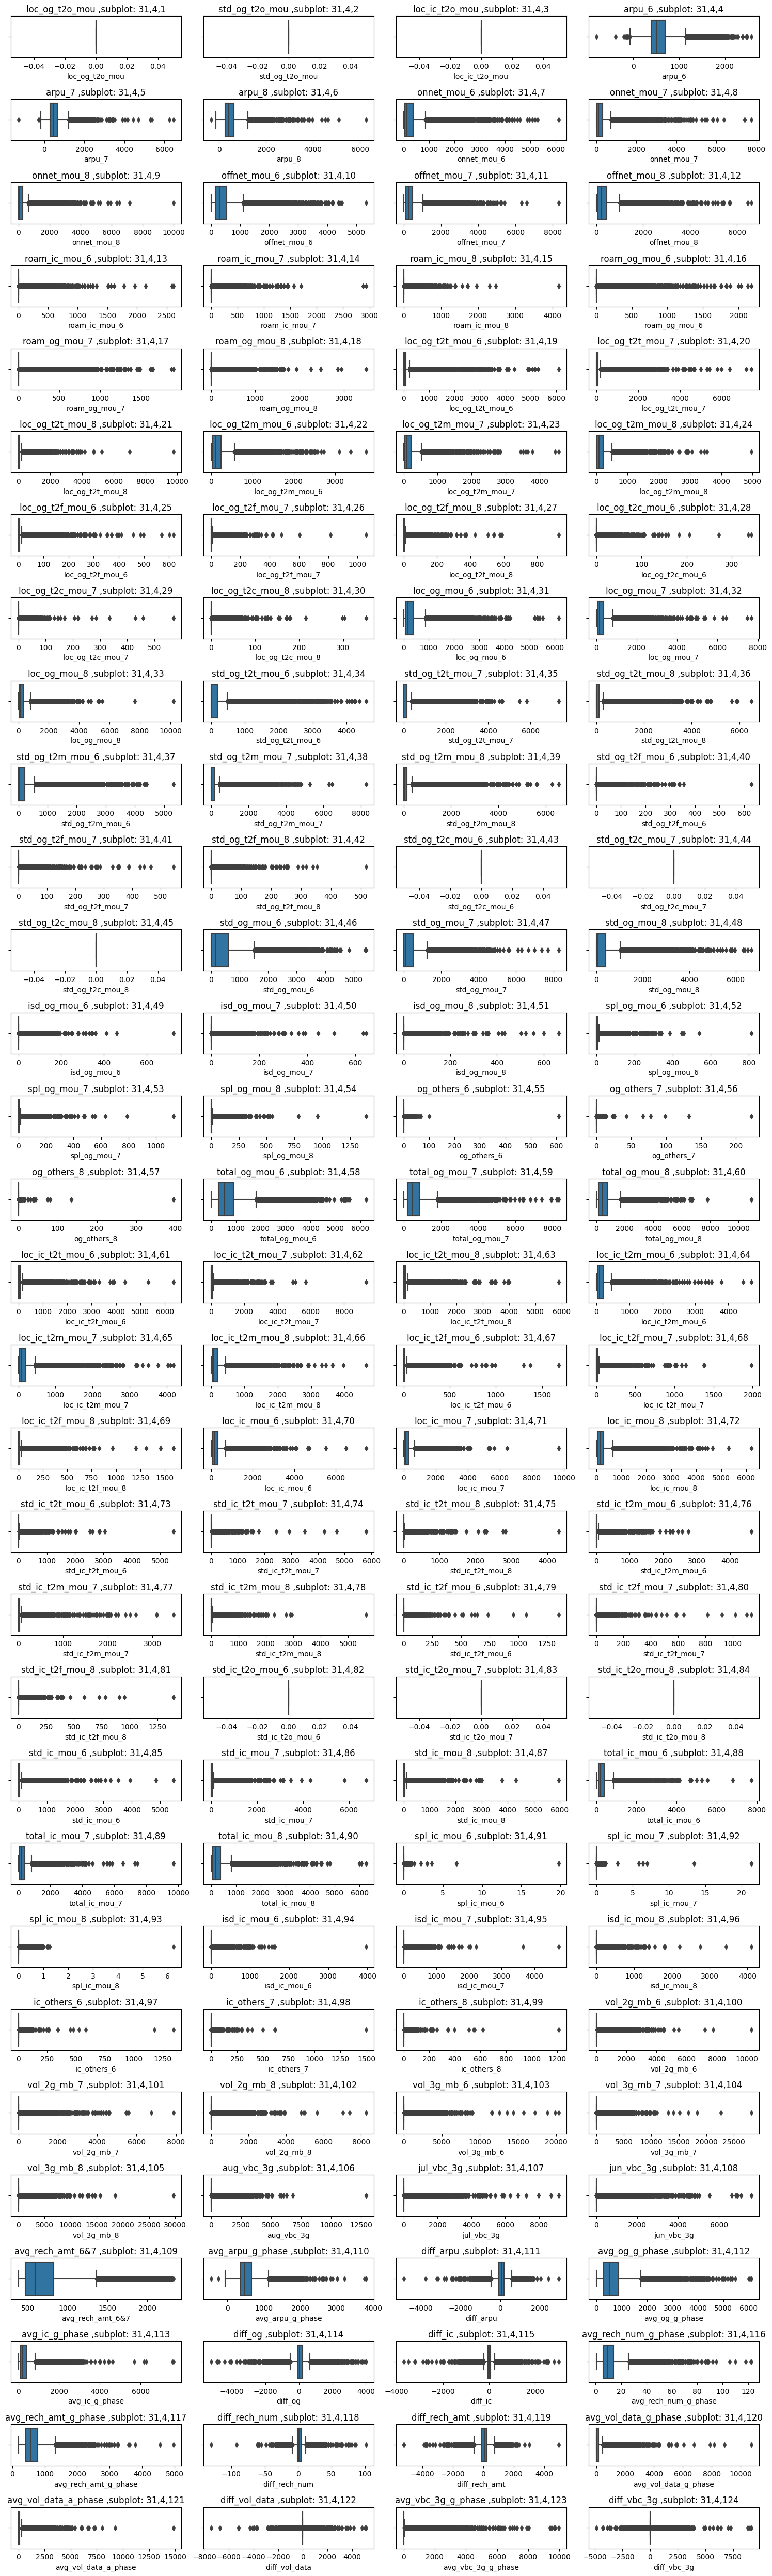

In [576]:
a ,b , c = 31 , 4 , 1
fig = plt.figure(figsize=(15,50))
for i in num_col:
    plt.subplot(a , b , c)
    plt.title('{} ,subplot: {},{},{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.boxplot(x=telecom_filtered[i] , orient='h')
    c = c+1
fig.tight_layout()
plt.show()

### Insights


Some features values stays to '0'. We won't be needed for these features to model building.

We can see most of the features contains outlier but these outlier pretty much close to plot.

### Integer

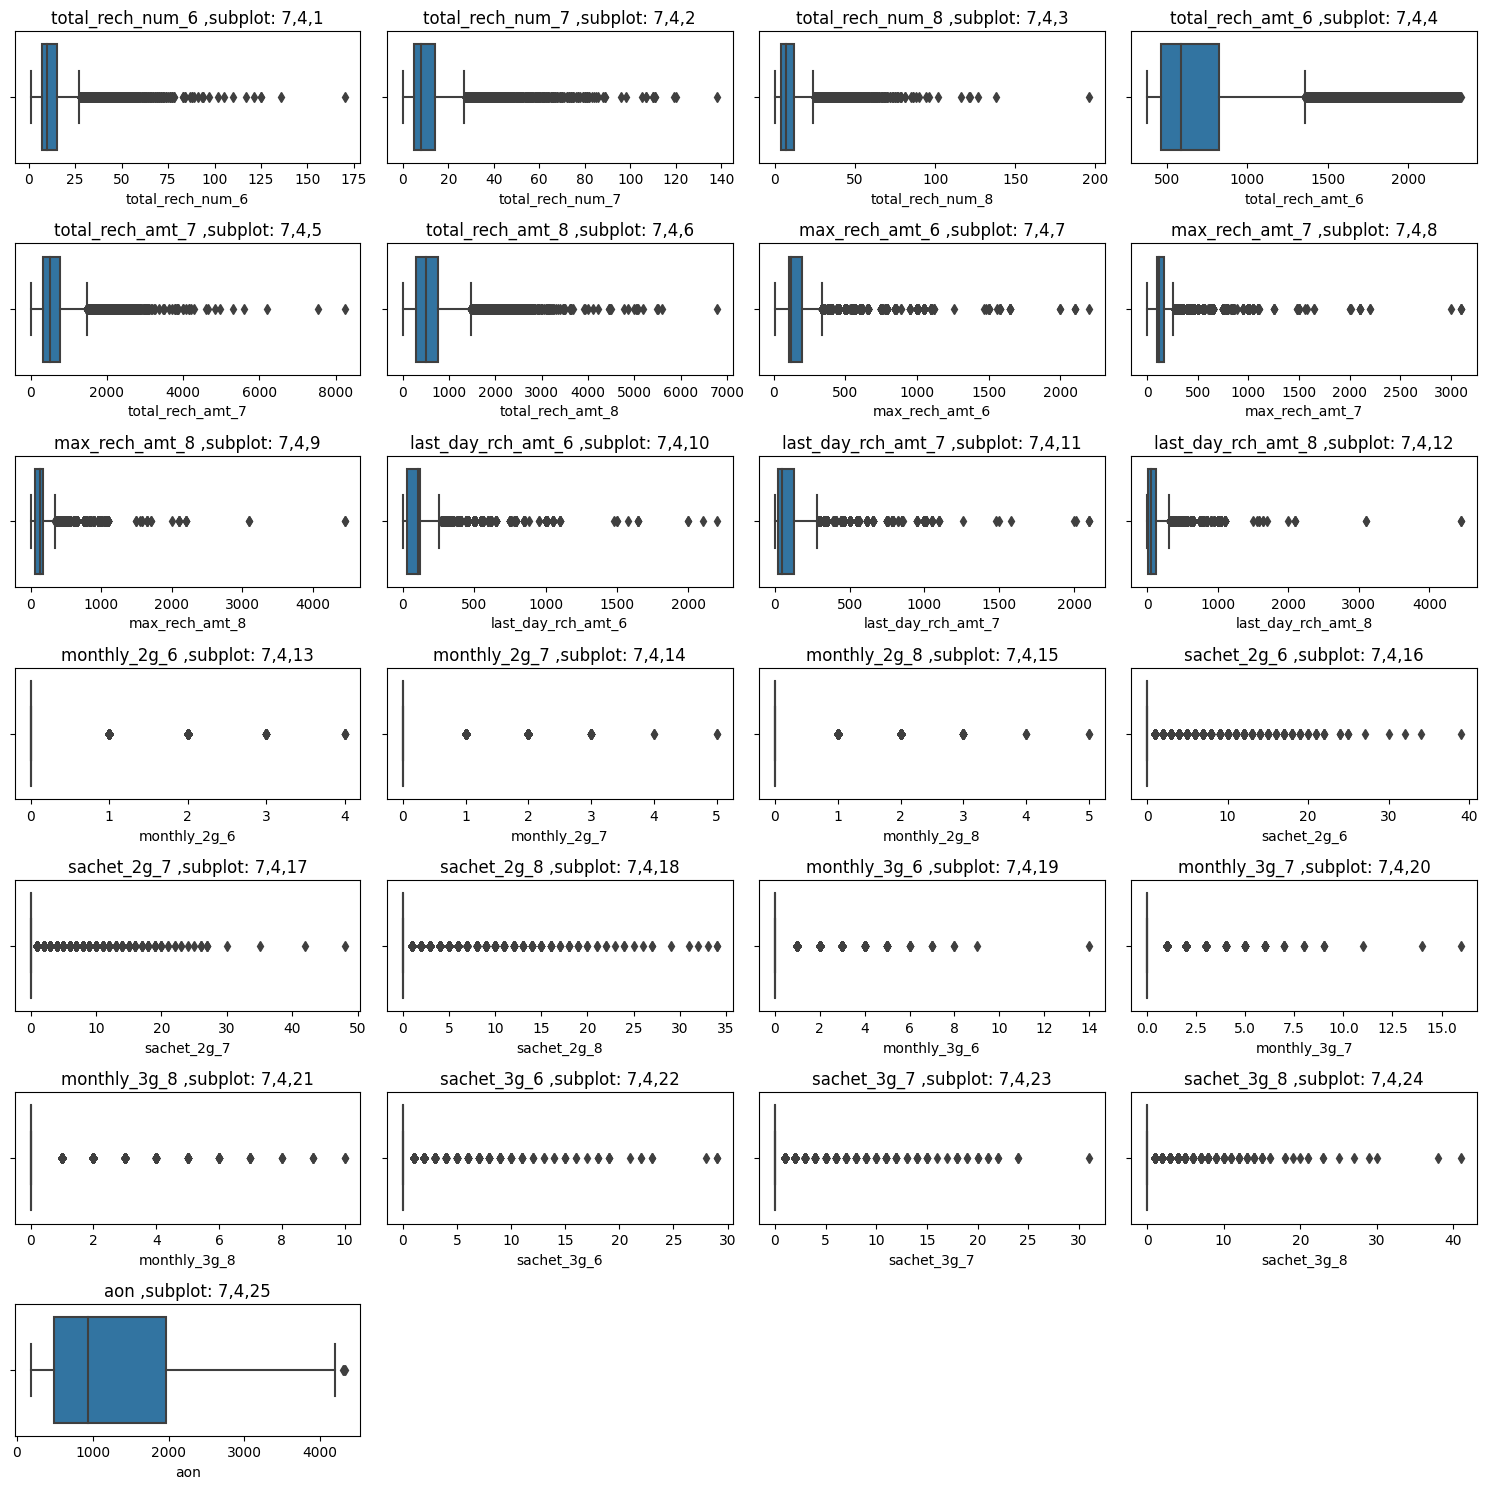

In [577]:
a ,b , c = 7 , 4 , 1
fig = plt.figure(figsize=(15,15))
for i in int_col:
    plt.subplot(a , b , c)
    plt.title('{} ,subplot: {},{},{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.boxplot(x=telecom_filtered[i] , orient='h')
    c = c+1
fig.tight_layout()
plt.show()

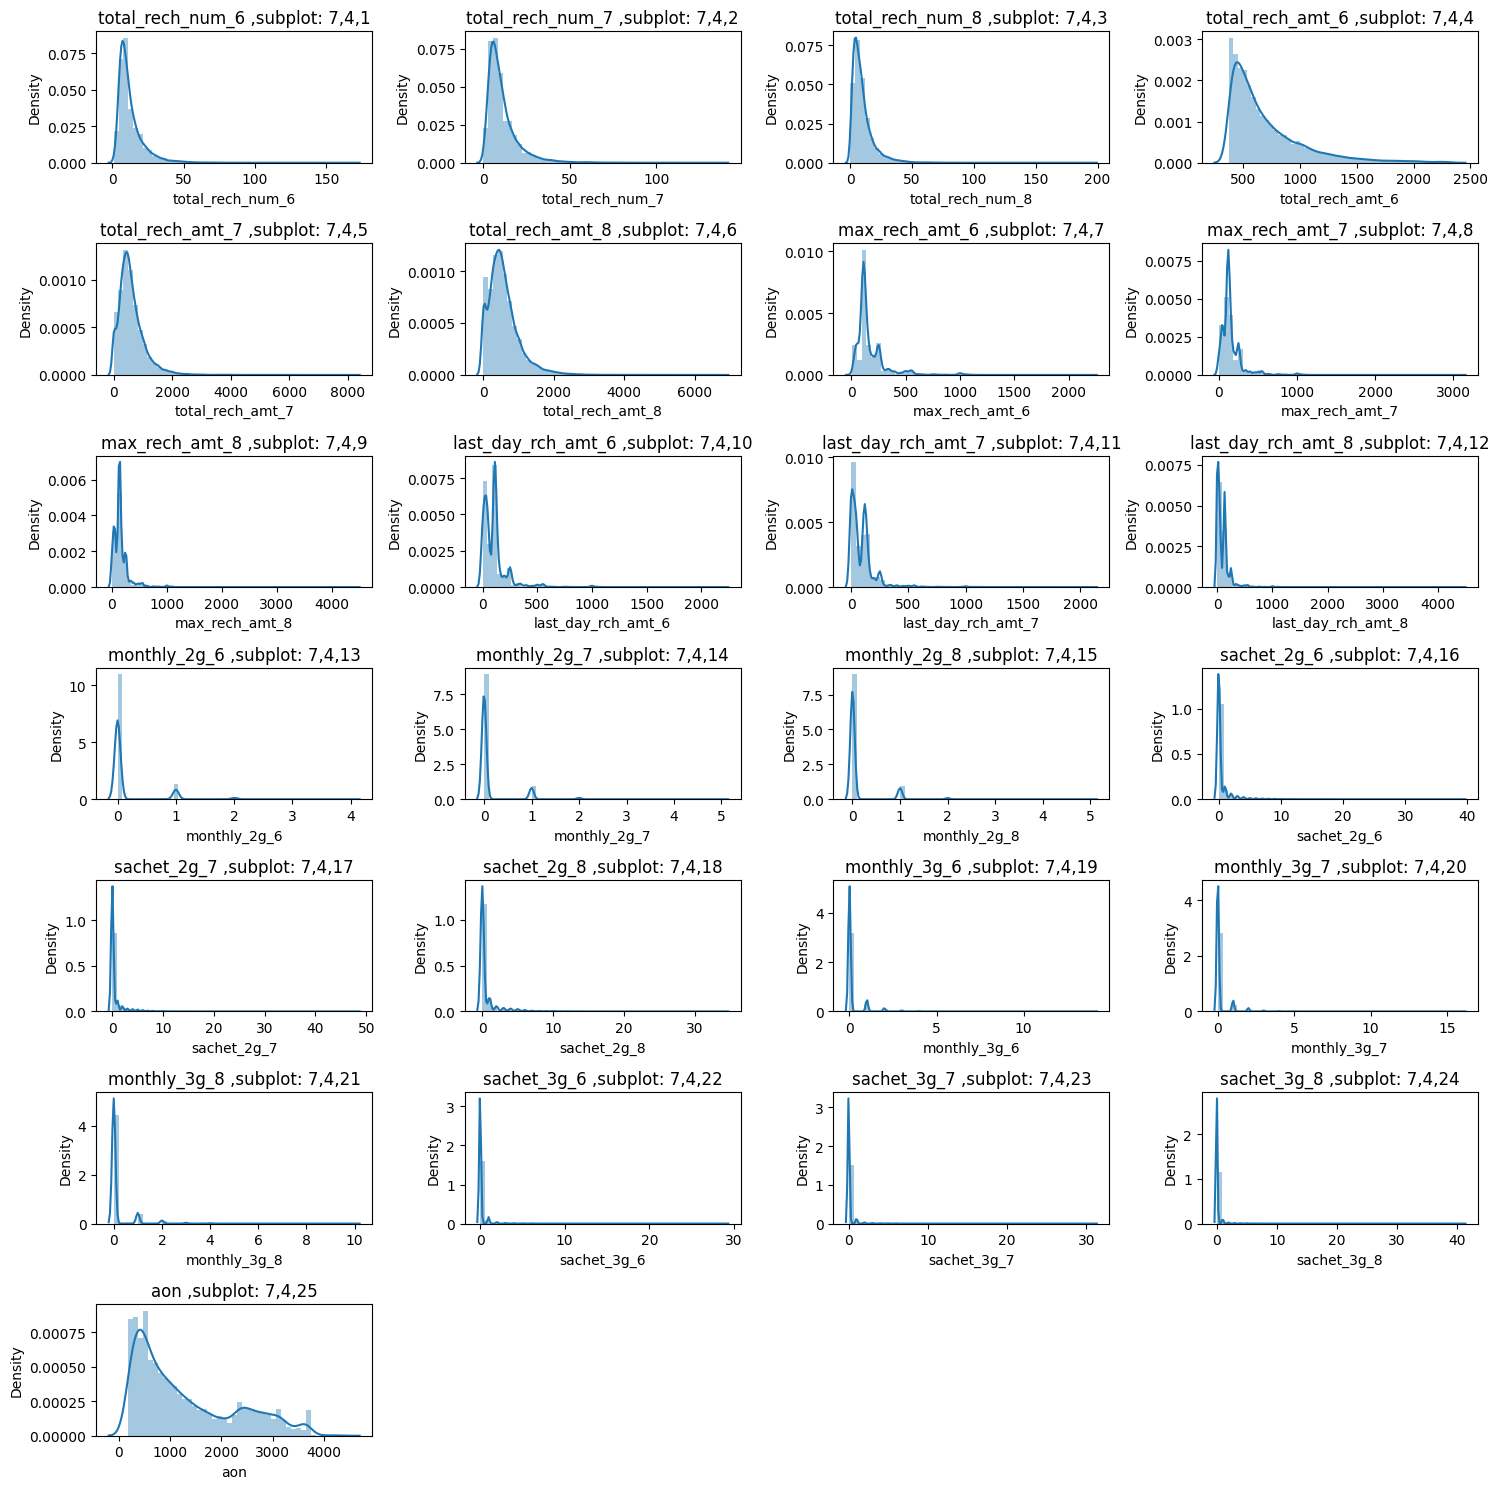

In [578]:
a ,b , c = 7 , 4 , 1
fig = plt.figure(figsize=(15,15))
for i in int_col:
    plt.subplot(a , b , c)
    plt.title('{} ,subplot: {},{},{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.distplot(telecom_filtered[i] , kde=True)
    c = c+1
fig.tight_layout()
plt.show()

## Insights


Most of the columns are not normally distributed.

Some of the customer choose monthly plans. Those who chose monthly plan low they won't churn immediately.

# Model Building

In [579]:
# Deviding data X ,y
y = telecom_filtered.pop('churn')
X = telecom_filtered.drop('mobile_number' , axis=1)

In [580]:
print(X.shape)
print(y.shape)

(28079, 149)
(28079,)


#### Dividing Data train , test and cross validation data.

In [581]:
# Train-Test split
X_1, X_test , y_1, y_test = train_test_split(X , y , train_size=0.8 , stratify=y ,random_state=42)
X_train, X_cv , y_train, y_cv = train_test_split(X_1 , y_1 , train_size=0.7 , stratify=y_1 ,random_state=42)
len(X_train)

15724

In [583]:
cols = X_train.columns.to_list()

In [584]:
# Scaling data using standard scaler
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test)

## Base Model Creation

In [291]:
#Creating base model 
log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)


LogisticRegression()

In [292]:
# Predicting through model
y_pred_log = log_reg.predict(X_test)

### As for our case study we have to who likely to churn.So we focus on Recall more.

In [293]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.9330484330484331
f1_score: 0.1965811965811966
Recall: 0.12073490813648294
Precision: 0.5287356321839081

 Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      5235
           1       0.53      0.12      0.20       381

    accuracy                           0.93      5616
   macro avg       0.73      0.56      0.58      5616
weighted avg       0.91      0.93      0.91      5616


 Confusion Matrix 
 [[5194   41]
 [ 335   46]]


### We are getting 12% for our base model which is pretty bad.

## Dealing with data imbalance

#### We will use some under sampling method

        Random under sampler

In [294]:
# RandomUnderSampler
under_sample = RandomOverSampler(random_state=42) 
X_resampled_us , y_resampled_us = under_sample.fit_resample(X_train , y_train)


In [295]:
# Logistics regression
log_reg_1 = LogisticRegression().fit(X_resampled_us , y_resampled_us)

In [296]:
#prediction
y_pred_log = log_reg_1.predict(X_test)

In [297]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.7863247863247863
f1_score: 0.3311036789297659
Recall: 0.7795275590551181
Precision: 0.21019108280254778

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      5235
           1       0.21      0.78      0.33       381

    accuracy                           0.79      5616
   macro avg       0.60      0.78      0.60      5616
weighted avg       0.93      0.79      0.84      5616


 Confusion Matrix 
 [[4119 1116]
 [  84  297]]


        Tomeks links

In [298]:
# TomekLinks
tomek_link = TomekLinks(sampling_strategy='majority')
X_resampled_tomek , y_resampled_tomek = tomek_link.fit_resample(X_train , y_train)

In [299]:
# Logistics regression
log_reg_1 = LogisticRegression().fit(X_resampled_tomek , y_resampled_tomek)

In [300]:
# Prediction
y_pred_log = log_reg_1.predict(X_test)

In [301]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.9319800569800569
f1_score: 0.20746887966804978
Recall: 0.13123359580052493
Precision: 0.49504950495049505

 Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      5235
           1       0.50      0.13      0.21       381

    accuracy                           0.93      5616
   macro avg       0.72      0.56      0.59      5616
weighted avg       0.91      0.93      0.91      5616


 Confusion Matrix 
 [[5184   51]
 [ 331   50]]


### Now We will use Over Samling Method

        Random over sampler

In [302]:
# RandomOverSampler
over_sample = RandomOverSampler()
X_resampled_os , y_resampled_os = over_sample.fit_resample(X_train , y_train)

In [303]:
# Logistics regression
log_reg_1 = LogisticRegression().fit(X_resampled_os , y_resampled_os)

In [304]:
# Prediction
y_pred_log = log_reg_1.predict(X_test)

In [305]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.7882834757834758
f1_score: 0.3346390598768886
Recall: 0.7847769028871391
Precision: 0.21266002844950213

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      5235
           1       0.21      0.78      0.33       381

    accuracy                           0.79      5616
   macro avg       0.60      0.79      0.60      5616
weighted avg       0.93      0.79      0.84      5616


 Confusion Matrix 
 [[4128 1107]
 [  82  299]]


        Smote

In [306]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smt , y_resampled_smt = smote.fit_resample(X_train , y_train)

In [307]:
# Logistics regression
log_reg_1 = LogisticRegression().fit(X_resampled_smt , y_resampled_smt)

In [308]:
# Prediction
y_pred_log = log_reg_1.predict(X_test)

In [309]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.7996794871794872
f1_score: 0.34172030427150385
Recall: 0.7664041994750657
Precision: 0.21987951807228914

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      5235
           1       0.22      0.77      0.34       381

    accuracy                           0.80      5616
   macro avg       0.60      0.78      0.61      5616
weighted avg       0.93      0.80      0.85      5616


 Confusion Matrix 
 [[4199 1036]
 [  89  292]]


        Adasyn

In [310]:
# ADASYN
ada = ADASYN(random_state=42)
X_resampled_ada , y_resampled_ada = ada.fit_resample(X_train , y_train)

In [311]:
# Logistics regression
log_reg_1 = LogisticRegression().fit(X_resampled_ada , y_resampled_ada)

In [312]:
# Prediction
y_pred_log = log_reg_1.predict(X_test)

In [313]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.7754629629629629
f1_score: 0.3260288615713522
Recall: 0.800524934383202
Precision: 0.20469798657718122

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.77      0.87      5235
           1       0.20      0.80      0.33       381

    accuracy                           0.78      5616
   macro avg       0.59      0.79      0.60      5616
weighted avg       0.93      0.78      0.83      5616


 Confusion Matrix 
 [[4050 1185]
 [  76  305]]


#### We will go with Adasyn sampling methed recall value higher than others.

## PCA for reducing number of features.

In [314]:
# PCA
pca = PCA(random_state=42)

In [315]:
pca.fit(X_resampled_ada)

PCA(random_state=42)

In [316]:
# Principle components
pca.components_

array([[-1.03517330e-19, -0.00000000e+00, -2.22044605e-16, ...,
        -1.47866429e-02,  1.48372189e-02,  5.85969836e-03],
       [ 6.86293204e-20,  2.77555756e-17,  3.33066907e-16, ...,
         1.08101541e-02,  1.02750457e-01,  6.04619699e-02],
       [ 1.53325266e-19,  1.11022302e-16,  1.66533454e-16, ...,
        -4.90172979e-02,  1.76595105e-02, -6.02293704e-03],
       ...,
       [ 0.00000000e+00,  2.77099910e-01, -7.98071249e-03, ...,
        -1.39010309e-02, -1.09773100e-01,  9.45660757e-02],
       [ 0.00000000e+00,  3.65051910e-02,  8.78716021e-02, ...,
        -4.18082833e-02,  8.47351608e-02, -1.02397723e-01],
       [-0.00000000e+00, -4.56672396e-01, -8.14202310e-03, ...,
         3.88257769e-04, -1.89598772e-02,  4.39198938e-03]])

In [317]:
# Looking variance ratio of each components
pca.explained_variance_ratio_

array([1.28382137e-01, 1.01028860e-01, 5.94415173e-02, 5.45224549e-02,
       4.37600219e-02, 4.03647866e-02, 3.89940484e-02, 3.34100461e-02,
       2.13185334e-02, 2.10518018e-02, 1.93505109e-02, 1.86223819e-02,
       1.69560773e-02, 1.62765744e-02, 1.58182142e-02, 1.48274498e-02,
       1.45568027e-02, 1.44538379e-02, 1.37910992e-02, 1.35002447e-02,
       1.17964456e-02, 1.13310334e-02, 1.09542103e-02, 1.03991991e-02,
       9.94915132e-03, 9.74667362e-03, 8.83298385e-03, 8.71646343e-03,
       8.03782202e-03, 7.62237403e-03, 7.36029239e-03, 7.17687389e-03,
       6.95698170e-03, 6.72433854e-03, 6.45768857e-03, 6.28466999e-03,
       6.24503309e-03, 6.04411357e-03, 5.94241191e-03, 5.71863540e-03,
       5.70321536e-03, 5.52122102e-03, 5.26087565e-03, 4.82202444e-03,
       4.63433153e-03, 4.52719993e-03, 4.28186052e-03, 4.18951608e-03,
       4.15099926e-03, 4.06334154e-03, 3.77339518e-03, 3.55989190e-03,
       3.29906679e-03, 3.21287142e-03, 3.10821758e-03, 3.06663602e-03,
      

### Ploting a scree plot


In [318]:
# Storing cumulative sum in var_cum
var_cumu = np.cumsum(pca.explained_variance_ratio_)



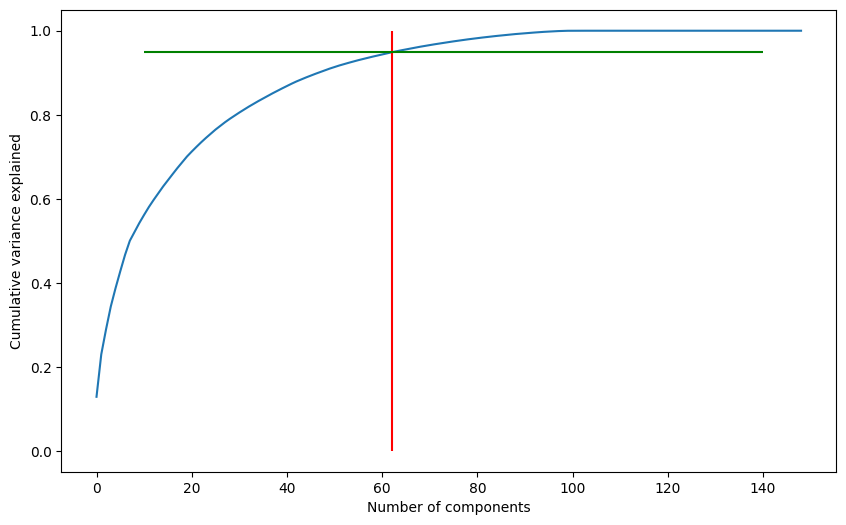

In [319]:
# Ploting the plot
fig = plt.figure(figsize=(10,6))
plt.plot(var_cumu)

plt.hlines(y=0.95 , xmax=140 , xmin=10 , colors='g')
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of components")
plt.show()

We can see that 62 components explain amost more than 95% variance of the data. So, we will perform PCA with 62 components.

In [320]:
# Instantiate PCA with 62 components
pca_final = IncrementalPCA(n_components=62)

In [321]:
# Fitting and transforming the X_resampled_ada
X_train_pca = pca_final.fit_transform(X_resampled_ada)

### Applying transformation on test and cross validation data

In [97]:
X_test_pca = pca_final.transform(X_test)
X_cv_pca = pca_final.transform(X_cv)

## Main Model Building

## Logistics Regression

In [98]:
log_reg = LogisticRegression().fit(X_train_pca , y_resampled_ada)

In [99]:
y_pred_log = log_reg.predict(X_test_pca)

In [100]:
# Checking Prediction score
print('Accuracy:' ,accuracy_score(y_test , y_pred_log))
print('f1_score:' ,f1_score(y_test , y_pred_log))
print('Recall:' , recall_score(y_test , y_pred_log))
print('Precision:' , precision_score(y_test , y_pred_log))
print('\n Classification Report \n', classification_report(y_test , y_pred_log))
print('\n Confusion Matrix \n' , confusion_matrix(y_test , y_pred_log))

Accuracy: 0.7768874643874644
f1_score: 0.3267060720042988
Recall: 0.7979002624671916
Precision: 0.20540540540540542

 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      5235
           1       0.21      0.80      0.33       381

    accuracy                           0.78      5616
   macro avg       0.59      0.79      0.60      5616
weighted avg       0.93      0.78      0.83      5616


 Confusion Matrix 
 [[4059 1176]
 [  77  304]]


#### Hyper parameter tuning

In [101]:
# Creating KFold 
folds = KFold(shuffle=True , random_state=42)

# Specifying parameters
params = { 'C' : [0.01 , 0.1 , 1 , 10 , 100 , 1000]}

# Specifing score as recall as we are more focused on acheiving the higher recall than the accuracy

model_cv = GridSearchCV(estimator= LogisticRegression() ,
                        param_grid= params , 
                        scoring= "recall" , 
                        cv= folds , 
                        verbose= 2 , 
                        return_train_score= True)

# Fit Model
model_cv.fit(X_train_pca , y_resampled_ada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ........................................

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=2)

In [102]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108312,0.010497,0.003799,0.000750,0.01,{'C': 0.01},0.839049,0.837838,0.836156,0.831907,0.832284,0.835447,0.002889,6,0.835977,0.835598,0.837963,0.835463,0.837870,0.836574,0.001109
1,0.142322,0.020997,0.003397,0.000488,0.1,{'C': 0.1},0.838710,0.837838,0.836848,0.832934,0.834272,0.836120,0.002180,5,0.836994,0.836107,0.838808,0.836648,0.838638,0.837439,0.001087
2,0.170601,0.018767,0.003799,0.000401,1,{'C': 1},0.840068,0.839189,0.836156,0.834303,0.835598,0.837063,0.002197,3,0.837334,0.836617,0.839061,0.837156,0.838382,0.837710,0.000885
3,0.191801,0.023472,0.003799,0.000747,10,{'C': 10},0.839728,0.839527,0.836502,0.833619,0.835930,0.837061,0.002308,4,0.836910,0.836702,0.839061,0.837749,0.838382,0.837761,0.000886
4,0.213802,0.015066,0.003998,0.000632,100,{'C': 100},0.840407,0.839865,0.836502,0.833619,0.836261,0.837331,0.002510,2,0.836825,0.836617,0.838977,0.837664,0.838553,0.837727,0.000927
5,0.223202,0.025771,0.003797,0.000402,1000,{'C': 1000},0.840068,0.839865,0.836848,0.833619,0.836261,0.837332,0.002411,1,0.836910,0.836787,0.839061,0.837749,0.838553,0.837812,0.000892


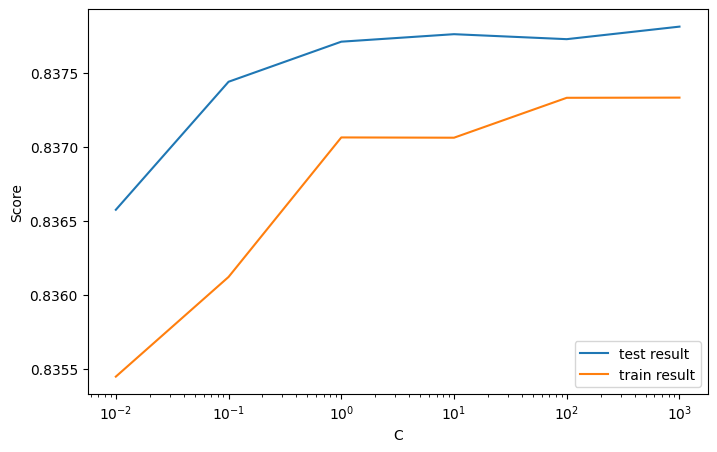

In [103]:
# plot of C versus train and validation scores
plt.figure (figsize=(8 ,5))
plt.plot(cv_results['param_C'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_C'] , cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend('Train_result' , loc='upper left')
plt.legend(['test result', 'train result'], loc='lower right')
plt.xscale('log')
plt.show()


In [104]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {} at C = {}".format(best_score, best_C))

 The highest test sensitivity is 0.8373320300062282 at C = 1000


### We can see best sesitivity show when 'C' 1000 but we select 'C' 100 since both train and test score close to each other.

### Logistic regression with optimal C

In [105]:
# Initiating the model C = 100
log_reg = LogisticRegression(C=100)


In [106]:
# Fit the model on the train set
log_reg.fit(X_train_pca, y_resampled_ada)

LogisticRegression(C=100)

In [150]:
# predicting on train and test set
y_pred_log = log_reg.predict(X_test_pca)
y_train_pred_log = log_reg.predict(X_train_pca)


        On train data

In [151]:
# Confusion matrix

confusion = confusion_matrix(y_resampled_ada, y_train_pred_log)
print(confusion)

[[11463  3193]
 [ 2384 12352]]


In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_ada, y_train_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8102544910179641
Sensitivity:- 0.8382193268186754
Specificity:- 0.7821370087336245


        On test data

In [155]:
# Confusion matrix

confusion = confusion_matrix(y_test, y_pred_log)
print(confusion)

[[4061 1174]
 [  78  303]]


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7770655270655271
Sensitivity:- 0.7952755905511811
Specificity:- 0.7757402101241643


### **Model Summery**
*Train*

Accuracy:- 0.8102544910179641

Sensitivity:- 0.8382193268186754

Specificity:- 0.7821370087336245


 *Test*

Accuracy:- 0.7770655270655271

Sensitivity:- 0.7952755905511811

Specificity:- 0.7757402101241643


### Random Forest classifier

In [114]:
ra_f = RandomForestClassifier()

#### Hyperparameter tuning

In [115]:
# Specifying parameters
params_en = {
            'max_depth' : [3 , 5 , 7 , 12] , 
            'min_samples_leaf' : [5 , 10 ,20 , 50 , 100 ] , 
            'max_features' : [20 , 30 , 50 , 62 ] , 
            'n_estimators' : [100 , 200 ]

}

In [116]:
# Instantiating the grid search model
grid_search = GridSearchCV( estimator= ra_f , 
                            param_grid= params_en ,
                            cv= 3 , 
                            n_jobs= -1 , 
                            verbose= 1 , 
                            return_train_score= True

)

In [117]:
# Fit the model
grid_search.fit(X_train_pca, y_resampled_ada)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 12],
                         'max_features': [20, 30, 50, 62],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=3)

In [123]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.86874030330161 using {'max_depth': 12, 'max_features': 30, 'min_samples_leaf': 5, 'n_estimators': 200}


In [206]:
# results of grid search CV
rfc_pd = pd.DataFrame(grid_search.cv_results_)

In [242]:
# results of grid search CV manually
rfc_manual = rfc_pd[(rfc_pd['mean_test_score'] < .87) & (rfc_pd['mean_train_score'] < .85)]
rfc_manual.sort_values(by='rank_test_score' , ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
89,99.196846,2.470067,0.179669,0.004921,7,20,100,200,"{'max_depth': 7, 'max_features': 20, 'min_samp...",0.806083,0.813718,0.824538,0.814780,0.007572,71,0.853986,0.845930,0.846440,0.848785,0.003683
88,50.008329,0.903686,0.089667,0.003301,7,20,100,100,"{'max_depth': 7, 'max_features': 20, 'min_samp...",0.805675,0.813923,0.821884,0.813827,0.006618,75,0.857150,0.845011,0.846440,0.849534,0.005417
118,153.193585,2.046275,0.093548,0.002408,7,62,100,100,"{'max_depth': 7, 'max_features': 62, 'min_samp...",0.798734,0.805349,0.820557,0.808213,0.009137,80,0.854905,0.842715,0.849553,0.849058,0.004989
61,204.842268,2.639977,0.151000,0.004968,5,50,5,200,"{'max_depth': 5, 'max_features': 50, 'min_samp...",0.798632,0.804634,0.808309,0.803858,0.003988,81,0.843728,0.834090,0.827252,0.835023,0.006758
63,205.334936,4.631871,0.150000,0.002450,5,50,10,200,"{'max_depth': 5, 'max_features': 50, 'min_samp...",0.796693,0.805349,0.808717,0.803586,0.005064,82,0.843575,0.836030,0.827711,0.835772,0.006479


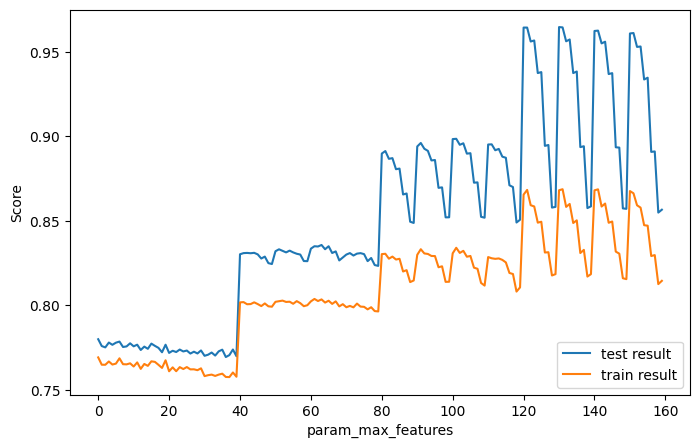

In [243]:
# plot of C versus train and validation scores
plt.figure (figsize=(8 ,5))
plt.plot( rfc_pd['mean_train_score'])
plt.plot( rfc_pd['mean_test_score'])
plt.xlabel('param_max_features')
plt.ylabel('Score')
plt.legend('Train_result' , loc='upper left')
plt.legend(['test result', 'train result'], loc='lower right')

plt.show()

#### Taking max_depth=5, min_samples_leaf=5, max_features=50, n_estimators=200. Since both mean_train_score and mean_test_score pretty close and higher that 80%

### Model with best values

In [253]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier( bootstrap=True,
                                    max_depth=5,
                                    min_samples_leaf=5, 
                                    max_features=50,
                                    n_estimators=200 ,
                                    n_jobs=-1)

In [254]:
rfc_model.fit(X_train_pca , y_resampled_ada)

RandomForestClassifier(max_depth=5, max_features=50, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1)

In [255]:
# predicting on train and test set
y_pred_log = rfc_model.predict(X_test_pca)
y_train_pred_log = rfc_model.predict(X_train_pca)


In [256]:
# Confusion matrix

confusion = confusion_matrix(y_resampled_ada, y_train_pred_log)
print(confusion)


[[12161  2495]
 [ 2526 12210]]


In [257]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [258]:
# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_ada, y_train_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8291712030484486
Sensitivity:- 0.8285830618892508
Specificity:- 0.8297625545851528


In [259]:
# Confusion matrix

confusion = confusion_matrix(y_test, y_pred_log)
print(confusion)

[[4293  942]
 [ 106  275]]


In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8133903133903134
Sensitivity:- 0.7217847769028871
Specificity:- 0.8200573065902579


### **Model Summery**
*Train*

Accuracy:- 0.8291712030484486

Sensitivity:- 0.8285830618892508

Specificity:- 0.8297625545851528

 *Test*

Accuracy:- 0.8133903133903134

Sensitivity:- 0.7217847769028871

Specificity:- 0.8200573065902579


### **We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.**

## validating both models on Cross Validation set


### Logistics model

In [262]:
# predicting on train and test set
y_cv_pred_log = log_reg.predict(X_cv_pca)

In [263]:
# Confusion matrix

confusion = confusion_matrix(y_cv, y_cv_pred_log)
print(confusion)

[[5874  407]
 [ 240  218]]


In [264]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [265]:
# Accuracy
print("Accuracy:-",accuracy_score(y_cv, y_cv_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9039916901617451
Sensitivity:- 0.4759825327510917
Specificity:- 0.9352014010507881


In [268]:
# predicting on train and test set
y_cv_pred_log = rfc_model.predict(X_cv_pca)

In [269]:
# Confusion matrix

confusion = confusion_matrix(y_cv, y_cv_pred_log)
print(confusion)

[[5345  936]
 [ 168  290]]


In [270]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [271]:
# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_ada, y_train_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8291712030484486
Sensitivity:- 0.6331877729257642
Specificity:- 0.8509791434484955


## Final Conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the TREE models preforms well. For both the models the sensitivity was approx 84% on Train set and 80% on test. Also we have good accuracy of apporx 81% on Train set and 79% on test.
When we cross validate with Unkown data sensitivity drops huge.

## Without PCA

In [386]:
# All divided datasets and its lenghts
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)
print(X_cv.shape , y_cv.shape)

(15724, 149) (15724,)
(5616, 149) (5616,)
(6739, 149) (6739,)


### Base Logistic Regression and all features check

In [392]:
# Initiating Model
X_train_sm = sm.add_constant(X_train) 
log_regres = sm.GLM(y_train , X_train_sm , family=sm.families.Binomial())
log_regres.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                15724
Model:                            GLM   Df Residuals:                    15599
Model Family:                Binomial   Df Model:                          124
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.4
Date:                Sat, 13 Jan 2024   Deviance:                       5120.8
Time:                        15:32:47   Pearson chi2:                 2.67e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1570
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3294      0.175    -24.716      0.000      -4.673      -3.986
x1          6.793e-08   5.61e-08      1.210      0.226   -4.21e-08    1.78e-07
x2          1.031e-07   4.38e-08      2.357      0.018    1.74e-08    1.89e-07
x3         -2.613e-08   7.24e-08     -0.361      0.718   -1.68e-07    1.16e-07
x4             0.0520      0.112      0.465      0.642      -0.167       0.271
x5             0.3088      0.093      3.324      0.001       0.127       0.491
x6             0.2718      0.093      2.939      0.003       0.091       0.453
x7            -4.0407      4.038     -1.001      0.317     -11.955       3.873
x8             6.3673      3.637      1.751      0.080      -0.761      13.496
x9            -2.2791      3.695     -0.617      0.537      -9.521       4.963
x10           -3.6621      4.021     -0.911      0.362     -11.544       4.220
x11            6.5489      3.510      1.866      0.062      -0.330      13.428
x12           -3.0705      3.564     -0.862      0.389     -10.055       3.914
x13            0.0121      0.046      0.264      0.792      -0.078       0.102
x14            0.0480      0.055      0.881      0.379      -0.059       0.155
x15           -0.1368      0.052     -2.642      0.008      -0.238      -0.035
x16            0.9962      1.019      0.977      0.328      -1.001       2.994
x17           -1.1376      0.686     -1.659      0.097      -2.482       0.206
x18            0.6959      0.807      0.863      0.388      -0.885       2.277
x19         2995.8358   1576.606      1.900      0.057     -94.255    6085.927
x20         2045.1196   1754.476      1.166      0.244   -1393.591    5483.830
x21         4151.7906   1780.815      2.331      0.020     661.458    7642.123
x22         3131.5424   1648.243      1.900      0.057     -98.955    6362.039
x23         2031.8107   1743.209      1.166      0.244   -1384.816    5448.438
x24         4295.7708   1842.349      2.332      0.020     684.834    7906.708
x25          266.5373    140.257      1.900      0.057      -8.362     541.436
x26          185.6180    159.463      1.164      0.244    -126.924     498.160
x27          384.3326    164.764      2.333      0.020      61.401     707.264
x28            0.0081      0.034      0.237      0.813      -0.059       0.075
x29            0.0083      0.057      0.145      0.885      -0.104       0.120
x30            0.0213      0.063      0.337      0.736      -0.102       0.145
x31        -9069.3730   3037.412     -2.986      0.003    -1.5e+04   -3116.155
x32        -1413.7064   3459.020     -0.409      0.683   -8193.261    5365.848
x33         1427.4826   3709.102      0.385      0.700   -5842.223    8697.188
x34        -1860.2601   2980.489     -0.624      0.533   -7701.912    3981.392
x35        -5480.0205   3225.408     -1.699      0.089   -1.18e+04     841.662
x3

### Base Model Analysis
1. we can see some high positive and negative correlation.
2. Many Features contains high P value.


### We use Recursive Feature Elimination (RFE) for important Feature selection.

#

### Reapplying ADASYN 

In [585]:
# ADASYN
ada = ADASYN(random_state=42)
X_train , y_train = ada.fit_resample(X_train , y_train)

### Feature Selection Using RFE

In [586]:
log_reg = LogisticRegression()

Since we have 149 feature, We will choose 20 features at first

In [587]:
rfe = RFE(log_reg , n_features_to_select=20)
rfe.fit(X_train , y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [588]:
rfe_1 = X_train.columns[rfe.support_]
print(rfe_1)

Index(['onnet_mou_8', 'offnet_mou_6', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_8', 'og_others_7',
       'og_others_8', 'total_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_amt_6',
       'last_day_rch_amt_8', 'aon', 'diff_ic', 'diff_rech_num',
       'avg_vol_data_a_phase'],
      dtype='object')


In [589]:
X_train_rfe = X_train[rfe_1]
X_train_rfe.shape

(29392, 20)

### Model 1

In [590]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)

#Instantiate the model
log_reg_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
log_reg_1 = log_reg_1.fit()

log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                29392
Model:                            GLM   Df Residuals:                    29371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13230.
Date:                Sat, 13 Jan 2024   Deviance:                       26460.
Time:                        16:58:47   Pearson chi2:                 1.09e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3850
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5337      0.033    -47.047      0.000      -1.598      -1.470
onnet_mou_8              1.9273      0.088     21.794      0.000       1.754       2.101
offnet_mou_6             0.4506      0.092      4.895      0.000       0.270       0.631
loc_og_t2t_mou_8        -0.6196      0.057    -10.857      0.000      -0.731      -0.508
loc_og_t2m_mou_6        -0.4034      0.059     -6.857      0.000      -0.519      -0.288
loc_og_mou_7             0.5318      0.050     10.532      0.000       0.433       0.631
std_og_t2m_mou_6        -0.2960      0.082     -3.603      0.000      -0.457      -0.135
std_og_t2m_mou_8         1.1509      0.078     14.825      0.000       0.999       1.303
og_others_7             -0.5674      0.853     -0.665      0.506      -2.240       1.105
og_others_8             -1.2906      0.445     -2.901      0.004      -2.163      -0.419
total_og_mou_8          -2.8153      0.127    -22.124      0.000      -3.065      -2.566
loc_ic_mou_8            -0.9816      0.050    -19.716      0.000      -1.079      -0.884
spl_ic_mou_7            -0.3414      0.053     -6.491      0.000      -0.445      -0.238
spl_ic_mou_8            -0.3210      0.026    -12.507      0.000      -0.371      -0.271
total_rech_num_6        -0.4416      0.024    -18.649      0.000      -0.488      -0.395
total_rech_amt_6         0.3189      0.024     13.394      0.000       0.272       0.366
last_day_rch_amt_8      -0.4439      0.026    -17.171      0.000      -0.495      -0.393
aon                     -0.3414      0.020    -17.442      0.000      -0.380      -0.303
diff_ic                  0.3512      0.026     13.675      0.000       0.301       0.402
diff_rech_num            0.5369      0.026     20.913      0.000       0.487       0.587
avg_vol_data_a_phase    -0.9966      0.039    -25.292      0.000      -1.074      -0.919
========================================================================================
"""

In [591]:
# Droping 'og_others_7' since high P value
X_train_rfe = X_train_rfe.drop('og_others_7' ,axis=1)

### Model 2

In [592]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)

#Instantiate the model
log_reg_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
log_reg_2 = log_reg_2.fit()

log_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                29392
Model:                            GLM   Df Residuals:                    29372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13230.
Date:                Sat, 13 Jan 2024   Deviance:                       26461.
Time:                        16:59:06   Pearson chi2:                 1.11e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3849
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5245      0.029    -52.883      0.000      -1.581      -1.468
onnet_mou_8              1.9285      0.088     21.809      0.000       1.755       2.102
offnet_mou_6             0.4508      0.092      4.898      0.000       0.270       0.631
loc_og_t2t_mou_8        -0.6195      0.057    -10.857      0.000      -0.731      -0.508
loc_og_t2m_mou_6        -0.4037      0.059     -6.863      0.000      -0.519      -0.288
loc_og_mou_7             0.5319      0.050     10.533      0.000       0.433       0.631
std_og_t2m_mou_6        -0.2960      0.082     -3.604      0.000      -0.457      -0.135
std_og_t2m_mou_8         1.1512      0.078     14.830      0.000       0.999       1.303
og_others_8             -1.3170      0.433     -3.040      0.002      -2.166      -0.468
total_og_mou_8          -2.8167      0.127    -22.136      0.000      -3.066      -2.567
loc_ic_mou_8            -0.9817      0.050    -19.717      0.000      -1.079      -0.884
spl_ic_mou_7            -0.3413      0.053     -6.487      0.000      -0.444      -0.238
spl_ic_mou_8            -0.3213      0.026    -12.523      0.000      -0.372      -0.271
total_rech_num_6        -0.4420      0.024    -18.672      0.000      -0.488      -0.396
total_rech_amt_6         0.3191      0.024     13.404      0.000       0.272       0.366
last_day_rch_amt_8      -0.4440      0.026    -17.175      0.000      -0.495      -0.393
aon                     -0.3415      0.020    -17.447      0.000      -0.380      -0.303
diff_ic                  0.3511      0.026     13.674      0.000       0.301       0.401
diff_rech_num            0.5373      0.026     20.932      0.000       0.487       0.588
avg_vol_data_a_phase    -0.9964      0.039    -25.290      0.000      -1.074      -0.919
========================================================================================
"""

### Checking Variance Influence factor(VIF)

In [593]:
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,offnet_mou_6,27.87
5,std_og_t2m_mou_6,24.31
8,total_og_mou_8,21.99
0,onnet_mou_8,11.23
3,loc_og_t2m_mou_6,8.40
6,std_og_t2m_mou_8,7.04
4,loc_og_mou_7,4.57
2,loc_og_t2t_mou_8,2.54
17,diff_rech_num,2.24
12,total_rech_num_6,1.87


In [594]:
# Droping 'offnet_mou_6' since high VIF value
X_train_rfe = X_train_rfe.drop('offnet_mou_6' ,axis=1)

### Model 3

In [595]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)

#Instantiate the model
log_reg_3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
log_reg_3 = log_reg_3.fit()

log_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                29392
Model:                            GLM   Df Residuals:                    29373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13243.
Date:                Sat, 13 Jan 2024   Deviance:                       26486.
Time:                        17:00:23   Pearson chi2:                 1.01e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5267      0.029    -52.840      0.000      -1.583      -1.470
onnet_mou_8              1.9341      0.088     21.868      0.000       1.761       2.107
loc_og_t2t_mou_8        -0.6283      0.057    -10.961      0.000      -0.741      -0.516
loc_og_t2m_mou_6        -0.1672      0.033     -4.997      0.000      -0.233      -0.102
loc_og_mou_7             0.5425      0.051     10.721      0.000       0.443       0.642
std_og_t2m_mou_6         0.0911      0.022      4.187      0.000       0.048       0.134
std_og_t2m_mou_8         1.1760      0.077     15.186      0.000       1.024       1.328
og_others_8             -1.2777      0.439     -2.910      0.004      -2.138      -0.417
total_og_mou_8          -2.8527      0.127    -22.446      0.000      -3.102      -2.604
loc_ic_mou_8            -0.9880      0.050    -19.788      0.000      -1.086      -0.890
spl_ic_mou_7            -0.3444      0.053     -6.544      0.000      -0.448      -0.241
spl_ic_mou_8            -0.3217      0.026    -12.535      0.000      -0.372      -0.271
total_rech_num_6        -0.4450      0.024    -18.822      0.000      -0.491      -0.399
total_rech_amt_6         0.3585      0.023     15.912      0.000       0.314       0.403
last_day_rch_amt_8      -0.4399      0.026    -17.090      0.000      -0.490      -0.389
aon                     -0.3345      0.020    -17.151      0.000      -0.373      -0.296
diff_ic                  0.3386      0.025     13.281      0.000       0.289       0.389
diff_rech_num            0.5281      0.026     20.673      0.000       0.478       0.578
avg_vol_data_a_phase    -1.0076      0.039    -25.589      0.000      -1.085      -0.930
========================================================================================
"""

### Checking Variance Influence factor(VIF)

In [596]:
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
7,total_og_mou_8,21.97
0,onnet_mou_8,11.22
5,std_og_t2m_mou_8,7.03
3,loc_og_mou_7,4.57
2,loc_og_t2m_mou_6,2.77
1,loc_og_t2t_mou_8,2.54
16,diff_rech_num,2.24
11,total_rech_num_6,1.87
8,loc_ic_mou_8,1.78
4,std_og_t2m_mou_6,1.75


In [597]:
# Droping 'total_og_mou_8' since high VIF value
X_train_rfe = X_train_rfe.drop('total_og_mou_8' ,axis=1)

### Model 4

In [598]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)

#Instantiate the model
log_reg_4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
log_reg_4 = log_reg_4.fit()

log_reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                29392
Model:                            GLM   Df Residuals:                    29374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13547.
Date:                Sat, 13 Jan 2024   Deviance:                       27094.
Time:                        17:01:21   Pearson chi2:                 2.25e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3715
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4512      0.029    -49.844      0.000      -1.508      -1.394
onnet_mou_8              0.0048      0.019      0.249      0.804      -0.033       0.043
loc_og_t2t_mou_8        -0.3904      0.054     -7.165      0.000      -0.497      -0.284
loc_og_t2m_mou_6        -0.3567      0.031    -11.517      0.000      -0.417      -0.296
loc_og_mou_7             0.0971      0.042      2.299      0.022       0.014       0.180
std_og_t2m_mou_6         0.0861      0.022      3.951      0.000       0.043       0.129
std_og_t2m_mou_8        -0.4419      0.029    -15.258      0.000      -0.499      -0.385
og_others_8             -1.2749      0.524     -2.432      0.015      -2.302      -0.248
loc_ic_mou_8            -1.4460      0.049    -29.401      0.000      -1.542      -1.350
spl_ic_mou_7            -0.3779      0.053     -7.186      0.000      -0.481      -0.275
spl_ic_mou_8            -0.3337      0.026    -13.005      0.000      -0.384      -0.283
total_rech_num_6        -0.4804      0.024    -20.426      0.000      -0.527      -0.434
total_rech_amt_6         0.3756      0.022     17.071      0.000       0.333       0.419
last_day_rch_amt_8      -0.4601      0.025    -18.149      0.000      -0.510      -0.410
aon                     -0.3456      0.019    -18.083      0.000      -0.383      -0.308
diff_ic                  0.4936      0.026     19.261      0.000       0.443       0.544
diff_rech_num            0.5972      0.025     23.802      0.000       0.548       0.646
avg_vol_data_a_phase    -1.0202      0.039    -26.091      0.000      -1.097      -0.944
========================================================================================
"""

In [599]:
# Droping 'onnet_mou_8' since high P value
X_train_rfe = X_train_rfe.drop('onnet_mou_8' ,axis=1)

### Model 5

In [600]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)

#Instantiate the model
log_reg_5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
log_reg_5 = log_reg_5.fit()

log_reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                29392
Model:                            GLM   Df Residuals:                    29375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13547.
Date:                Sat, 13 Jan 2024   Deviance:                       27094.
Time:                        17:01:35   Pearson chi2:                 2.26e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3715
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4510      0.029    -49.865      0.000      -1.508      -1.394
loc_og_t2t_mou_8        -0.3882      0.054     -7.218      0.000      -0.494      -0.283
loc_og_t2m_mou_6        -0.3579      0.031    -11.692      0.000      -0.418      -0.298
loc_og_mou_7             0.0970      0.042      2.295      0.022       0.014       0.180
std_og_t2m_mou_6         0.0853      0.022      3.963      0.000       0.043       0.127
std_og_t2m_mou_8        -0.4416      0.029    -15.262      0.000      -0.498      -0.385
og_others_8             -1.2757      0.524     -2.433      0.015      -2.303      -0.248
loc_ic_mou_8            -1.4459      0.049    -29.404      0.000      -1.542      -1.349
spl_ic_mou_7            -0.3778      0.053     -7.185      0.000      -0.481      -0.275
spl_ic_mou_8            -0.3340      0.026    -13.023      0.000      -0.384      -0.284
total_rech_num_6        -0.4791      0.023    -20.941      0.000      -0.524      -0.434
total_rech_amt_6         0.3774      0.021     18.084      0.000       0.336       0.418
last_day_rch_amt_8      -0.4596      0.025    -18.193      0.000      -0.509      -0.410
aon                     -0.3460      0.019    -18.152      0.000      -0.383      -0.309
diff_ic                  0.4932      0.026     19.281      0.000       0.443       0.543
diff_rech_num            0.5954      0.024     24.818      0.000       0.548       0.642
avg_vol_data_a_phase    -1.0217      0.039    -26.436      0.000      -1.097      -0.946
========================================================================================
"""

### Checking Variance Influence factor(VIF)

In [601]:
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,loc_og_mou_7,3.97
1,loc_og_t2m_mou_6,2.46
0,loc_og_t2t_mou_8,2.23
14,diff_rech_num,1.94
9,total_rech_num_6,1.76
3,std_og_t2m_mou_6,1.71
6,loc_ic_mou_8,1.67
4,std_og_t2m_mou_8,1.54
10,total_rech_amt_6,1.48
13,diff_ic,1.32


In [602]:
# Droping 'loc_og_mou_7' since high VIF value
X_train_rfe = X_train_rfe.drop('loc_og_mou_7' ,axis=1)

### Model 6

In [603]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)

#Instantiate the model
log_reg_6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
log_reg_6 = log_reg_6.fit()

log_reg_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                29392
Model:                            GLM   Df Residuals:                    29376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13550.
Date:                Sat, 13 Jan 2024   Deviance:                       27099.
Time:                        17:01:56   Pearson chi2:                 2.25e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3714
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4466      0.029    -49.909      0.000      -1.503      -1.390
loc_og_t2t_mou_8        -0.3183      0.043     -7.331      0.000      -0.403      -0.233
loc_og_t2m_mou_6        -0.3175      0.025    -12.758      0.000      -0.366      -0.269
std_og_t2m_mou_6         0.0825      0.021      3.841      0.000       0.040       0.125
std_og_t2m_mou_8        -0.4384      0.029    -15.179      0.000      -0.495      -0.382
og_others_8             -1.2759      0.524     -2.434      0.015      -2.303      -0.249
loc_ic_mou_8            -1.4236      0.048    -29.670      0.000      -1.518      -1.330
spl_ic_mou_7            -0.3751      0.053     -7.140      0.000      -0.478      -0.272
spl_ic_mou_8            -0.3342      0.026    -13.027      0.000      -0.385      -0.284
total_rech_num_6        -0.4834      0.023    -21.181      0.000      -0.528      -0.439
total_rech_amt_6         0.3811      0.021     18.304      0.000       0.340       0.422
last_day_rch_amt_8      -0.4593      0.025    -18.177      0.000      -0.509      -0.410
aon                     -0.3462      0.019    -18.162      0.000      -0.384      -0.309
diff_ic                  0.4999      0.025     19.659      0.000       0.450       0.550
diff_rech_num            0.6013      0.024     25.192      0.000       0.555       0.648
avg_vol_data_a_phase    -1.0228      0.039    -26.462      0.000      -1.099      -0.947
========================================================================================
"""

### Checking Variance Influence factor(VIF)

In [604]:
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
13,diff_rech_num,1.92
8,total_rech_num_6,1.75
2,std_og_t2m_mou_6,1.70
5,loc_ic_mou_8,1.62
3,std_og_t2m_mou_8,1.53
9,total_rech_amt_6,1.47
1,loc_og_t2m_mou_6,1.46
12,diff_ic,1.31
10,last_day_rch_amt_8,1.26
11,aon,1.20


#### Model 6 has acceptable VIF and low value. So We Select Model 6.

### Model performance on the train set

In [606]:
# Getting the predicted value on the train set
y_train_pred = log_reg_6.predict(X_train_sm)
y_train_pred.head()

0    0.641640
1    0.254059
2    0.430665
3    0.582183
4    0.193218
dtype: float64

#### Creating a dataframe contains with the actual churn and the predicted probabilities

In [607]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['custID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,custID
0,0,0.641640,0
1,0,0.254059,1
2,0,0.430665,2
3,0,0.582183,3
4,0,0.193218,4


#### Cutoff

In [608]:
# Creating columns for different probablity cutoffs
numbers = [float(x) /10  for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,custID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.641640,0,1,1,1,1,1,1,1,0,0,0
1,0,0.254059,1,1,1,1,0,0,0,0,0,0,0
2,0,0.430665,2,1,1,1,1,1,0,0,0,0,0
3,0,0.582183,3,1,1,1,1,1,1,0,0,0,0
4,0,0.193218,4,1,1,0,0,0,0,0,0,0,0


### Calculating the accuracy sensitivity and specificity for various probability cutoffs.

In [609]:
cutoff_df = pd.DataFrame(columns= ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 =confusion_matrix(y_train_pred_final['churn'] , y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,1] + cm1[1,0])
    cutoff_df.loc[i] = [i , accuracy , sensi , speci]

print(cutoff_df)



     prob  accuracy     sensi     speci
0.0   0.0  0.501361  1.000000  0.000000
0.1   0.1  0.645686  0.979370  0.310180
0.2   0.2  0.711146  0.958876  0.462063
0.3   0.3  0.755512  0.927999  0.582082
0.4   0.4  0.781981  0.884161  0.679244
0.5   0.5  0.794978  0.825529  0.764260
0.6   0.6  0.798483  0.757804  0.839383
0.7   0.7  0.778919  0.654520  0.903998
0.8   0.8  0.692297  0.436143  0.949850
0.9   0.9  0.559404  0.135654  0.985467


### Ploting graph

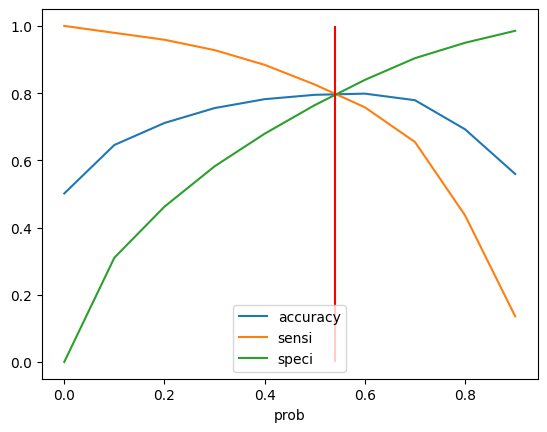

In [614]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54 , ymin=0 , ymax=1 , colors='r')
plt.show()

### Analysis of the above curve
Accuracy - Becomes stable around 0.54

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.54 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.54 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

In [616]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 

y_train_pred_final['final_predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,custID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.641640,0,1,1,1,1,1,1,1,0,0,0,1
1,0,0.254059,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.430665,2,1,1,1,1,1,0,0,0,0,0,0
3,0,0.582183,3,1,1,1,1,1,1,0,0,0,0,1
4,0,0.193218,4,1,1,0,0,0,0,0,0,0,0,0


### metrics and accuracy

In [619]:
# Accuracy
accuracy_score(y_train_pred_final['churn'] , y_train_pred_final['final_predicted'])

0.7949782253674469

In [622]:
# Confusion metrix

confusion = confusion_matrix(y_train_pred_final['churn'] , y_train_pred_final['final_predicted'])
confusion

array([[11201,  3455],
       [ 2571, 12165]], dtype=int64)

In [623]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [624]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Sensitivity:- 0.8255293159609121
Specificity:- 0.7642603711790393


### Plotting the ROC Curve 

In [627]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

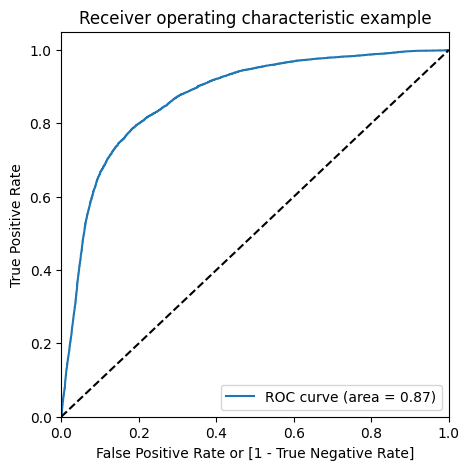

In [630]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

### Prediction on Test Data

In [636]:
# Taking columns that are used for model building
X_test_rfe = X_test[X_train_rfe.columns]

In [637]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_rfe)

In [639]:
# Predict on the test set
y_test_pred = log_reg_6.predict(X_test_sm)
y_test_pred.head()

90726    0.528282
48408    0.052112
64194    0.165878
57994    0.055959
30485    0.102523
dtype: float64

In [641]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
90726,0.528282
48408,0.052112
64194,0.165878
57994,0.055959
30485,0.102523


In [642]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
90726,0
48408,0
64194,0
57994,0
30485,0


In [643]:
# Putting index to Customer ID 
y_test_df['custID'] = y_test_df.index

In [644]:
# Removing index form the both dataframes for merging them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

y_test_pred_final.head()

,churn,custID,0
0,0,90726,0.528282
1,0,48408,0.052112
2,0,64194,0.165878
3,0,57994,0.055959
4,0,30485,0.102523


In [645]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [646]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['final_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)


### Metrics On Test Data

In [648]:
# Confusion matrix
confusion = confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['final_predicted'])
print(confusion)

[[4004 1231]
 [  83  298]]


In [649]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [651]:


# Accuracy
print("Accuracy:-",accuracy_score(y_test_pred_final['churn'], y_test_pred_final['final_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7660256410256411
Sensitivity:- 0.7821522309711286
Specificity:- 0.7648519579751671


## **Final conclusion**

### We can see that the logistic model with no PCA has stable sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

These are the important features 


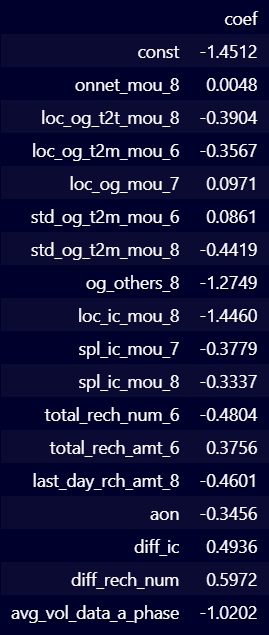